<a href="https://colab.research.google.com/github/Sangameshchandan/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#loading the data
data = pd.read_csv("/content/drive/MyDrive/ALMABETTER/Capstone Projects/3. Mobile Price Range Prediction/data_mobile_price_range.csv")

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1



# Explore the dataset


In [ ]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data.shape

(2000, 21)


We have 2000 samples and 21 attributes.
The last attribute is a target attribute, which means that we have labeled data

In [ ]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

We do not have any null values in our dataset.

In [ ]:
print(data.duplicated().any())

False


0 duplicated values in the dataframe

In [ ]:
#summary of the dataframe
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data['price_range'].unique()

array([1, 2, 3, 0])

We have four price ranges as target values which is multi-class classification problem.


Let's see our dataset is balanced or imbalanced?

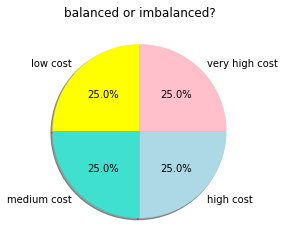

In [ ]:

labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = data['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()

dataset is balanced

# Data Visualization: Analyzing the Relationship Between Variables

let's see the correlation b/w features and target variable by plotting heatmap:


In [ ]:
corr = data.corr()

np.fill_diagonal(corr.values, 0)

corr.replace(0, np.nan, inplace=True)
plt.show()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,NaN,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,NaN,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,NaN,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,NaN,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,NaN,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,NaN,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,NaN,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,NaN,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,NaN,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,NaN,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


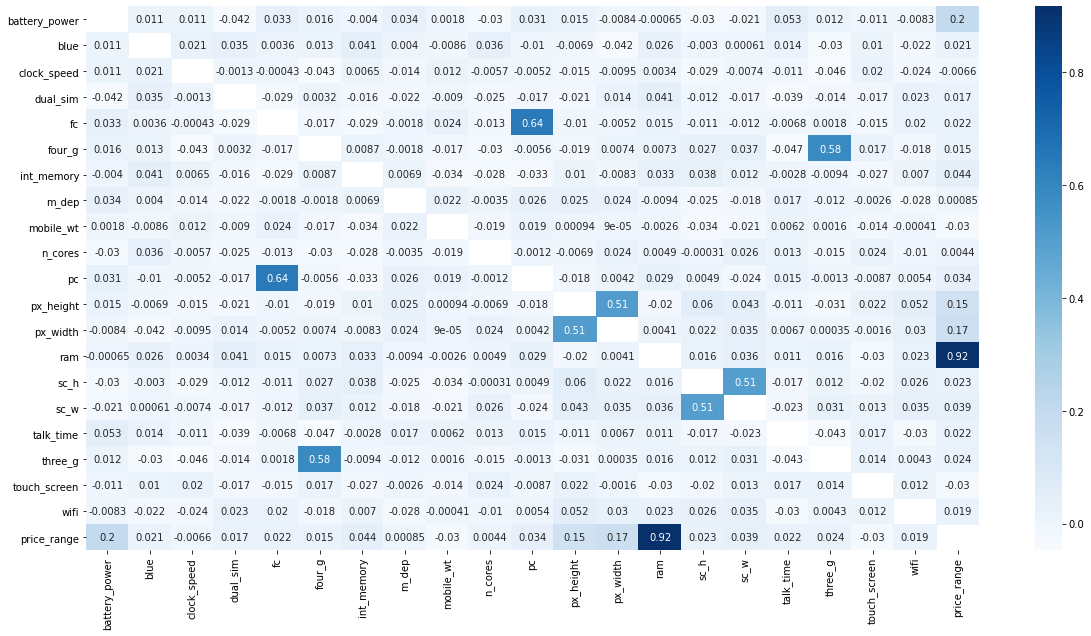

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Blues')

Display highest correlations between all of our variables

In [ ]:
corr.unstack().sort_values(kind='quicksort', na_position='first').drop_duplicates(keep='last')

price_range  price_range         NaN
talk_time    four_g        -0.046628
three_g      clock_speed   -0.046433
clock_speed  four_g        -0.043073
talk_time    three_g       -0.042688
                              ...   
sc_w         sc_h           0.506144
px_width     px_height      0.510664
three_g      four_g         0.584246
pc           fc             0.644595
price_range  ram            0.917046
Length: 211, dtype: float64


We see from the heatmap;

1. The most influential variable is ram.

2. Most of the variables have very little correlation to price range.

3. Primary camera mega pixels and front Camera mega pixels have correlation but they do not effect prige range.

4. 3G and 4G is somewhat correlated.

There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.


Display highest correlations between price_range and the other features in our dataset

In [ ]:
corr.abs()['price_range'].sort_values(ascending=False)

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
price_range           NaN
Name: price_range, dtype: float64

The highest correlations to our target variable (price_range) are:

ram

battery_power

px_width

px_height

Very high correlation between "price_range" and "ram" -- this means that we should use the ram variable in predicting the price range of a mobile phone.

**Key Variables Visualizations**

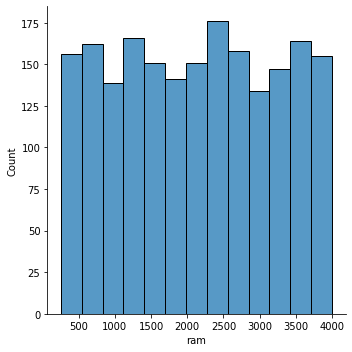

In [ ]:
sns.displot(data, x='ram')

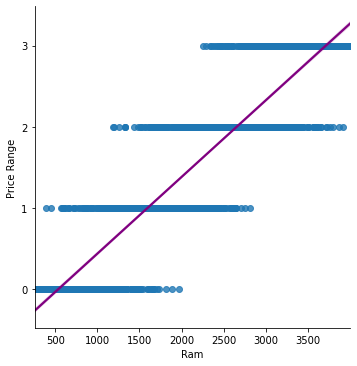

In [ ]:
sns.lmplot(x='ram', y='price_range', data=data, line_kws={'color': 'purple'})
plt.yticks([0, 1, 2, 3])
plt.xlabel('Ram')
plt.ylabel('Price Range')
plt.show()

The plot aboves shows the high correlation between ram and price range. It shows the general pattern: as ram increases, mobile's price increases

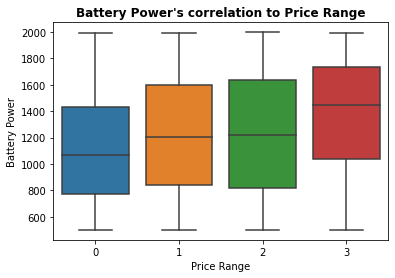

In [ ]:
sns.boxplot(x='price_range', y='battery_power', data=data)
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power\'s correlation to Price Range', weight='bold')
plt.show()

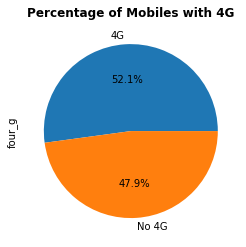

In [ ]:
four_g = data['four_g'].value_counts()
plt.title('Percentage of Mobiles with 4G', weight='bold')
labels_4g = ['4G', 'No 4G']
four_g.plot.pie(autopct="%.1f%%", labels=labels_4g)
plt.show()

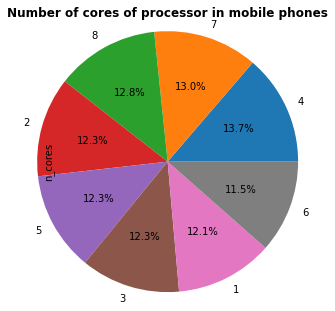

In [ ]:
n_cores = data['n_cores'].value_counts()
plt.title('Number of cores of processor in mobile phones\n\n', weight='bold')
n_cores.plot.pie(autopct="%.1f%%", radius=1.5)
plt.show()

using plotly to visualize the 3 most highly correlated variables to price_range

In [ ]:
import plotly.express as px
fig = px.scatter_3d(data.head(1000), x='ram', y='battery_power', z='px_width', color='price_range')
fig.show()

we see how ram, battery power, and px width all contribute to a mobile phone's price classification

# Implementation of ML Algorithms

To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.


In [ ]:
X = data.drop('price_range', axis=1)
y = data['price_range']

### **1.Train-Test-Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=100)

In [ ]:
models = {'KNN': KNeighborsClassifier(),
         'Logistic Regression': LogisticRegression(),
         'Random Forest': RandomForestClassifier()}
         
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'KNN': 0.9196969696969697,
 'Logistic Regression': 0.6272727272727273,
 'Random Forest': 0.8681818181818182}

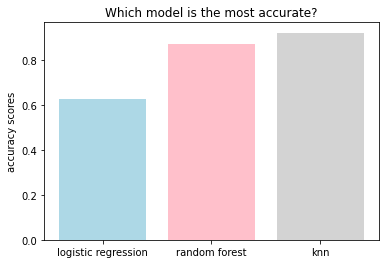

In [ ]:
models = ['logistic regression', 'random forest', 'knn']
acc_scores = [0.6272727272727273, 0.8681818181818182, 0.9196969696969697]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

Let's go through tuning hyperparemters of our KNN and Random Forest models.

## Hyperparameter tuning: **KNeighborsClassifier**

In [ ]:
train_scores = []

test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 92.42%


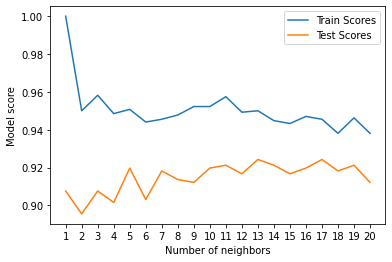

In [ ]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

n_neighbors = 13 seems to be the best choice.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'KNN Model Score: {knn.score(X_test, y_test) * 100}%')

KNN Model Score: 92.42424242424242%


## Hyperparemeter tuning: **Random Forest Model**


Tuning Random Forest Classifier using RandomizedSearchCV

In [ ]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [ ]:
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 760}

In [ ]:
rs_rf.score(X_test, y_test)

0.8772727272727273

### XGBoost

In [ ]:
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.896969696969697

Hyperparameter tuning: **XGBoost**

In [ ]:
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 
    'learning_rate': [0.2,0.5,0.8,1]}
    
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)
rs_xgb.fit(X_train, y_train)
xgb_pred_2 = rs_xgb.predict(X_test)
rs_xgb.score(X_test, y_test)

0.9212121212121213

Even after tuning our XGBoost model's hyperparameter, it still does not perform like KNN model.so, KNN is best model.
Finally, we'll evaluate our best performing model (KNN) using other metrics!

# Final Model Evaluation

**Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[175   3   0   0]
 [  7 146  10   0]
 [  0  12 142   7]
 [  0   0  11 147]]


**Classification Report**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       178
           1       0.91      0.90      0.90       163
           2       0.87      0.88      0.88       161
           3       0.95      0.93      0.94       158

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660



**Cross** **Validation**

In [ ]:
print(f'Cross Validation Scores: ' + str(cross_val_score(knn, X, y, cv=5)))

print(f'Cross Validation Score (Mean): ' + str(np.mean(cross_val_score(knn, X, y, cv=5))))

Cross Validation Scores: [0.94   0.935  0.9425 0.935  0.9175]
Cross Validation Score (Mean): 0.9339999999999999


Looking at the results of the cross validation, we can be sure that even if we performed the split on our data differently.




# Conclusion

The most important features in predicting a mobile phone's price are ram, battery power, pixel height and pixel width! We figured this out by using a correlation matrix, specifically looking at the most highly correlated variables to price range.


We used machine learning to predict mobile phones price's using all of the features in our dataset. Found that the best performing model was KNN -- outperforming Logistic Regression, Random Forest, and even XGBoost.Even able to improve our KNN model's score by tuning its hyperparameters (n_neighbors). Later on, Evaluated our KNN model using other metrics and saw that it performed very well by those metrics, as well. The fact that KNN was the best performing model to the idea that sometimes the more complicated models might not be the best model for a given dataset.


